# Matplotlib is beautiful


![https://gemini.google.com/](beautiful_bars.png)


Matplotlib is a python module that is used to visualize data. It gives us the opportunity to more easily digest our data through various types of graphs, or even compare data on a single plot.

There are various types of plots some are listed below:
- Line Plots
- Scatter Plots
- Bar Plots
- Box and Whiskers
- Stem Plots
- And so much more! 

Matplotlib also gives us the ability to change how our plots look, edit axis, add legends, stack data and more. 

Many examples can be found here: https://matplotlib.org/stable/gallery/index.html

Lets get plotting!

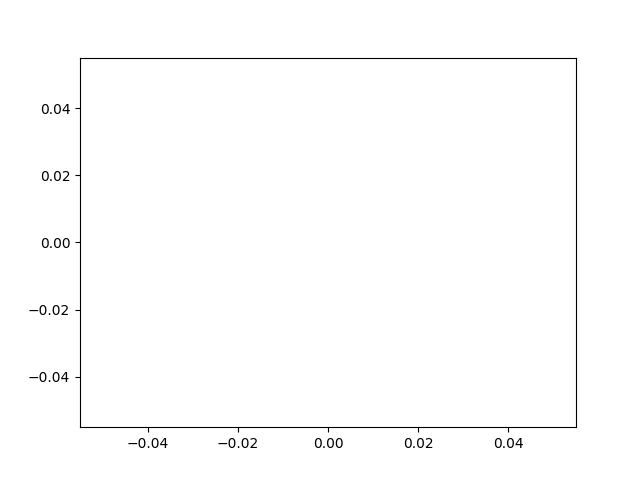

In [1]:
# Lets look at what a plot with no data looks like
import matplotlib.pyplot as plt
%matplotlib ipympl 
plt.figure() # Starts a figure
plt.plot() # Creates the plot
plt.show() # Shows the plot

We can see that even when we have no data a plot is shown. A figure is can be thought of each plotting canvas. The plt.plot() method is used to plot the data on the canvas, then show the plot with plt.show()

Lets try adding some data to the plot!

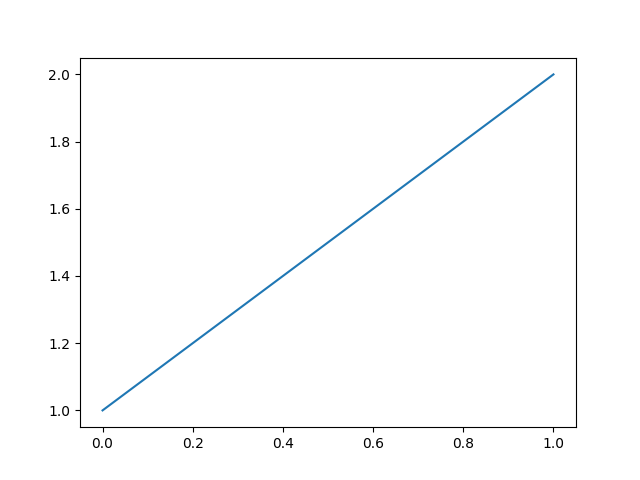

In [2]:

# plt.plot will default to a line plot. For use to see a line we need two data points. The "bare-est bones" line plot we can show is between two points.

x = [0, 1]
y = [1, 2]
plt.figure()
plt.plot(x, y)
plt.show()


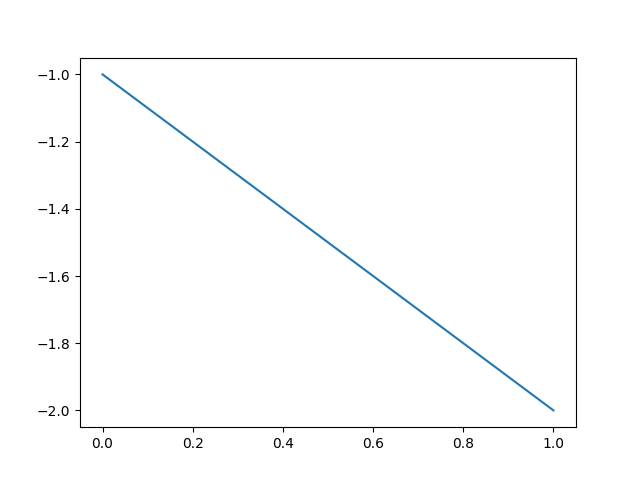

In [3]:
# Above we used lists but numpy arrays work too
import numpy as np 

x_arry = np.array(x)
neg_y_arry = -np.array(y) # Note we are leveraging numpy to make the values negative without looping!
plt.figure()
plt.plot(x_arry, neg_y_arry)
plt.show()

In [4]:
# We can also use pandas data frames! 
import pandas as pd
values_df = pd.DataFrame([0, 4, 5, 7, 3, 2, -1])
plt.figure()
plt.plot(values_df)
plt.show()



ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Note we can also call the plot function directly form the dataframe too.
values_df.plot()
plt.show()

You may notice that we have a legend in the top right as well, this is because pandas creates an index for us and applies the legend automatically.

# Lets Pull Some Data We Made

We made two files np_exp.csv and pd_exp.csv. They both have data we would like to plot. Lets compare them and look at some features we can use to make our plots a bit better.

In [ ]:
# First lets get the np_exp data.
np_exp_data = np.loadtxt("np_exp.csv", delimiter=',', dtype=int)

print(np_exp_data[0:10])
# Then lets see what it looks like
plt.figure()
plt.plot(np_exp_data)
plt.show()

Hmm that doesnt seem right. We have a blue line that looks flat and a orange line that is curving upwards. This is because the plt.plot is trying to seperate each column into its own Y data. It assumes there is a hidden index value called count that is shared between the "x" values and the "x^2" values. Lets fix that.

In [ ]:
plt.figure()
plt.plot(np_exp_data[:, 0], np_exp_data[:, 1])
plt.show()

That looks much better! Here we separated the numpy array into an x and y values using slicing. When there is only 1 piece of input, it sees it as the y value. On our first try it sees the numpy array as a single y value since it is one numpy object. In our second try we separated the single numpy array value into two, to be an x and a y.

Now lets try grabbing the pd_exp.csv data 

In [ ]:
pd_exp_data = pd.read_csv("pd_exp.csv", index_col=0)
plt.figure()
plt.plot(pd_exp_data)
plt.show()

Notice how we can use the dataframe by itself in the plt.plot call, this does not seem intuitive based on what we experience with the numpy array. The reason we can use the only the dataframe object here and not need to separate it into two objects is because the dataframe has the context as the index and matplotlib is smart enough to know our index is often used as the dependent variable.

What if we want to display both plots as the output of one cell? Lets give it go.

In [ ]:
plt.figure()
plt.plot(np_exp_data[:, 0], np_exp_data[:, 1])
plt.show()
plt.figure()
plt.plot(pd_exp_data)
plt.show()

Those plots look pretty good, but its hard to see the relationship between the two (and also tell them apart). One way we can compare them is to not call the plt.show() until the end. Sequential plt.plot() will stack on the same plot until it is shown with the plt.show() method.

In [ ]:
# Line Plot
plt.figure()
plt.plot(np_exp_data[:, 0], np_exp_data[:, 1])
#plt.show()
plt.plot(pd_exp_data)
plt.show()

Wow! When they are plotted on the same line it really shows how much faster x^3 grows compared to x^2!

Lets look at other plot types too

In [ ]:
# Scatter Plot
plt.figure()
plt.scatter(np_exp_data[:, 0], np_exp_data[:, 1])
#plt.show()
plt.scatter(pd_exp_data.index, pd_exp_data["x^2"]) # Scatter we must specify the x and y
plt.show()

In [ ]:
# Bar Plot
plt.figure()
plt.bar(np_exp_data[:, 0], np_exp_data[:, 1])
#plt.show()
plt.bar(pd_exp_data.index, pd_exp_data["x^2"]) # Bar we must specify the x and y
plt.show()

## Lets make things more clear to the reader

Our plots look pretty bare, there are no labels, title, or legends, things we would be expected to place on a plot if we presented our data. 

In [ ]:
# Line Plot
plt.figure()
plt.plot(np_exp_data[:, 0], np_exp_data[:, 1])
plt.plot(pd_exp_data)

# We must apply our features to our plot before showing for them to show up on our plot. 

# Lets add a title
plt.title("A comparison of x^2 and x^3")

# Lets add axis labels
plt.xlabel("x")
plt.ylabel("f(x)")

# Lets add a legend
plt.legend(["x^3", "x^2"]) # Note that you must put the legend in a list format

plt.show()

In [ ]:
# We can also format our lines on our plot! 
plt.figure()
# Line Plot
plt.plot(np_exp_data[:, 0], np_exp_data[:, 1], 'gs-') # We want (g)reen (s)quares with (-) through them
plt.plot(pd_exp_data, 'ro') # We want (r)ed circles (o) 

# We must apply our features to our plot before showing for them to show up on our plot. 

# Lets add a title
plt.title("A comparison of x^2 and x^3")

# Lets add axis labels
plt.xlabel("x")
plt.ylabel("f(x)")

# Lets add a legend
plt.legend(["x^3", "x^2"]) # Note that you must put the legend in a list format

plt.show()

The formats can be found here, and can also be directly specified via keywords. 

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#:~:text=may%20be%20ambiguous.-,Markers,-character


References:https://jakevdp.github.io/PythonDataScienceHandbook/#:~:text=4.%20Visualization%20with%20Matplotlib%C2%B6

Matplotlib Website: https://matplotlib.org/stable/

Matplotlib User Guide: https://matplotlib.org/stable/users/index.html

Topics to Explore:
- We will explore more topics later but these would be good to look at if you are interested
- Visualizing Error
- Multiple Subplots (googling how to make subplots too)
- Customizing Ticks
- Seaborn (for even more beautiful plots), really great examples in the reading